<a href="https://colab.research.google.com/github/MounaS5/GNN_EHS/blob/master/GNNModelforRegressionandClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDKit and Pytorch Installation and Other Utilities Packages


In [ ]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()

# New RDKit Method

In [4]:
!pip install rdkit-pypi

     |████████████████████████████████| 18.6 MB 159 kB/s 


In [5]:
sys.path.append('/usr/local/lib/python3.7/site-packages/')

try:
  from rdkit import Chem
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run cell again.')
  exit()

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import AllChem, MACCSkeys, rdFMCS

from rdkit.Chem import Descriptors,Draw

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [6]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 
# DeepChem # Might come in use for advanced splits
!pip install --pre deepchem


Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 2.6 MB 6.3 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 1.4 MB 4.8 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 926 kB 5.2 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 382 kB 4.9 MB/s 
     |████████████████████████████████| 222 kB 5.4 MB/s 
     |████████████████████████████████| 376 kB 9.2 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.7.2-py3-none-any.whl size=388142 sha256=fa1ae35a83438df24fa393a43d56a0590247a92eb6669f047b353171be8892b9
  Stored in directory: /root/.cache/pip/wheels/55/93/b6/2eeb0465afe89aee74d7a07a606e9770466d7565abd45a99d5
Successfully built torch-g

In [7]:
# Utilities
import json
from collections import OrderedDict
from tqdm.autonotebook import tqdm

# Scientific python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.decomposition
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing

# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
import torch_geometric.nn as gnn
from torch_geometric.data import DataLoader, Data
print('Pytorch version:',torch.__version__)
print('Pytorch Geometric version:',torch_geometric.__version__)



tqdm.pandas()

# DeepChem
import deepchem as dc

# OS

import copy
from collections import Counter



Pytorch version: 1.9.0+cu102
Pytorch Geometric version: 1.7.2


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Mount Drive


In [8]:
from google.colab import drive
drive.mount("/content/drive")
!ls #To double check if it has been properly mounted

Mounted at /content/drive
drive  Miniconda3-latest-Linux-x86_64.sh  sample_data


#Load Modules


In [18]:
cd /content/drive/My\ Drive/Colab\ Notebooks/GNN_EHS/demo_module

/content/drive/My Drive/Colab Notebooks/GNN_EHS/demo_module


In [19]:
# very important, if you don't add the path to sys.path 
# list the program will not look for the file # Try print(sys.path)
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/GNN_EHS')
!ls

accessData.py	gnnModels_S.py			   NetworkP_Tr
accessPath.py	__init__.py			   prelimAnalysis.py
df_hyp.csv	Miniconda3-latest-Linux-x86_64.sh  __pycache__
df_hyp_S.csv	mutaPatternAnalysis.py		   utilities_Training_1.py
Featurizing.py	networkGraphsM.py		   utilities_Training.py
gnnModels_C.py	networkGraphs.py


In [43]:
execfile('accessData.py')
#execfile('accessPath.py')
execfile('Featurizing.py')
!pip install captum 
execfile('networkGraphs.py')
#execfile('networkGraphsM.py')
execfile('prelimAnalysis.py')
execfile('utilities_Training.py')
#execfile('gnnModels_S.py')


# Access Databases




Note: If its second muta_KNN dataset - change the string from 'mutagenic' and 'NON-mutagenic' to 'mutagen' and 'NON-mutagen' rsp.

Apply step 2 only if simpler molecular properties are needed.

In [21]:
########################
###### Step 1 ##########
########################

''' 
restructDB ( a , b , c )

a  = index of list 'ehsProp' [0-3]
b  = type of data base [0-3,0-3,0-3,0-2]
c  = ehs property list

'''
import demo_module
from demo_module import accessData
path = link(0,0)
print(path)
#[0,1],[2,0],[1,0],[1,2]
df = restructDB(path,0,0)

df.head(5)


Status = ['Training','Test']
train_idx,train_df,y_train = generateIndices(df,Status[0])
test_idx,test_df,y_test = generateIndices(df,Status[1])

#print(link(1,3,ehsProp))
print('Total Carc/Muta data       : ',(df[df['Experimental value']==1]).count()[0]) 
print('Total NON-(Carc/Muta) data : ',(df[df['Experimental value']==0]).count()[0])  #816
print('Total values in a dataset  : ', len(df.index))

print('********************')


print('Train total points : ', len(train_idx))
print('Test points        : ', len(test_idx))

########################
###### Step 2 ##########
########################

from demo_module import prelimAnalysis
mol_list = df['mol'].to_list()
mwt_list = df['Molecular Weight'].to_list()
# common atoms
no_X,total_atom_list = listCommonElements(mol_list)
per_C,wt_C = percentageC(total_atom_list,mwt_list)

df['X_Count'] = no_X
df['C %']= per_C
df['C_W'] = wt_C
# To capture aromatic rings
list_m =[]
for m in mol_list:
  k = getRingInfo(m)
  list_a = []
  for var in k:
    f = isRingAromatic(m,var)
    list_a.append(f)
  list_m.append(list_a)
# list_m is list of true or false
# For each molecule

### Total ring count 
d = [len(lst) for lst in list_m]
### Aromatic ring count 
count_arom=[sum(lst) for lst in list_m]

df['Ring_Count'] = count_arom



1.1.5
/content/drive/My Drive/GNNs/Property_databases/carcinogenicity/antares/dataset_CARC_ANTARES.txt
in generateIndices
in generateIndices
Total Carc/Muta data       :  783
Total NON-(Carc/Muta) data :  760
Total values in a dataset  :  1543
********************
Train total points :  1543
Test points        :  0


# Splitter

Can employ other type of spliiers as well.

Segregating compounds with rarely occurring atoms and adding them to train dataset might result in a validation dataset that is easier to predict as compared to train datset.

In [22]:
########################
###### Step 3 ##########
########################

a = ['Hg', 'Ga', 'Ni','V','Pb','Mo','Ti','In','Te','As','Sn','Si','Ca']
df_exceptions = df[df['SMILES'].str.contains('|'.join(a))]
df_rest = df[~df['SMILES'].str.contains('|'.join(a))]
df_exceptions.shape[0]
# Start with a very simple split
indices_df = df_rest.index.tolist()
#indices_df = df.index.tolist()
train_total_index, test_index = sklearn.model_selection.train_test_split(indices_df,test_size=0.2,random_state=40)
train_index, valid_index = sklearn.model_selection.train_test_split(train_total_index,test_size=0.25,random_state=40)
# Split normally and add exceptions to train data
indices_ex = df_exceptions.index.tolist()
train_index = train_index + indices_ex

# First Random Split
print('Train total points : ', len(train_total_index))
print('Test points        : ', len(test_index))
# Train Validation Split
print('\nTrain       : ', len(train_index))
print('Valid points: ', len(valid_index))
print('Test points : ', len(test_index))

train_idx = train_index
valid_idx = valid_index
test_idx = test_index


Train total points :  1227
Test points        :  307

Train       :  929
Valid points:  307
Test points :  307


# Molecule -> Graph -> Batch -> Molecule

- Call hyperparameters data frame. This can be altered based on what we chose as hyperparameters.

- Convert 'SMILES' strings to moleculare graphs and batch them together into a Data object



In [23]:
########################
###### Step 4 ##########
########################

hyp_pth = '/content/drive/My Drive/Colab Notebooks/df_hyp_S.xlsx' #df_hyp
df_hyp = pd.read_excel(hyp_pth)
df_hyp

,conv_dim,num_layer,lr,node_dim
0,16,3,0.000016,75
1,16,3,0.000011,75
2,16,3,0.000080,75
3,16,4,0.000016,75
4,16,4,0.000011,75
5,16,4,0.000080,75
6,16,5,0.000016,75
7,16,5,0.000011,75
8,16,5,0.000080,75
9,32,3,0.000016,75


In [24]:
########################
###### Step 5 ##########
########################

from demo_module import Featurizing

task_type = 'Classification'
possible_atom_list,Count = listOfAtoms(df)
print("Possible atom list:",possible_atom_list)
print(Count)
print('----------------')
target ='Experimental value'
batch_size=1
#y_scaler = None

y_test = df.loc[test_idx]['Experimental value'].values.reshape(-1,1)#df.loc[df.index.isin(test_index)]
y_train = df.loc[train_idx]['Experimental value'].values.reshape(-1,1)
y_valid = df.loc[valid_idx]['Experimental value'].values.reshape(-1,1)

if task_type == 'Regression':
  y_for_standarization = np.vstack((y_train, y_valid))
  y_scaler = sklearn.preprocessing.StandardScaler().fit(y_for_standarization)


train_loader,train_data = get_dataloader(df, train_idx, target, 'mol',batch_size)#[0:336]
valid_loader,valid_data = get_dataloader(df, valid_idx, target, 'mol',batch_size)#[0:336]
test_loader,test_data = get_dataloader(df, test_idx, target, 'mol', batch_size)#[0:84]

node_dim = n_atom_features()
edge_dim = n_bond_features()

print('Node/Edge dim: {}/{}'.format(node_dim, edge_dim))
print('Train/test   : {}/{}'.format(len(train_idx), len(test_idx)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Possible atom list: ['I', 'C', 'Sn', 'Cl', 'O', 'Si', 'Te', 'N', 'As', 'Pb', 'P', 'S', 'Br', 'F']
Counter({'C': 18168, 'O': 3978, 'N': 2539, 'Cl': 586, 'S': 307, 'F': 150, 'Br': 56, 'P': 39, 'I': 10, 'Sn': 4, 'As': 3, 'Si': 1, 'Pb': 1, 'Te': 1})
----------------



Node/Edge dim: 75/6
Train/test   : 929/307


# Model_Edge_Attributions ((NNConv))

In [ ]:
########################
###### Step 6 ##########
########################

from torch_geometric.nn import global_add_pool, global_mean_pool, global_max_pool, GlobalAttention, Set2Set
from torch_scatter import scatter_mean, scatter_add, scatter_max, scatter_min
class GNN(torch.nn.Module):
    def __init__(self, num_layer, drop_ratio, conv_dim, gnn_type, JK,graph_pooling):
        super(GNN, self).__init__()

        # Initialization
        self.num_layer  = num_layer
        self.drop_ratio = drop_ratio
        self.conv_dim   = conv_dim
        self.gnn_type   = gnn_type
        self.JK         = JK
        #self.num_tasks  = num_tasks    # 1 (output value??)
        self.graph_pooling = graph_pooling

        self.graph_pool_list = ["add","mean","max"]
        

        self.node_dim   =  n_atom_features()      # Num features nodes
        self.edge_dim   =  n_bond_features()      # Num features edges

        # List of GNNs
        self.convs       = torch.nn.ModuleList()
        self.batch_norms = torch.nn.ModuleList()

        # First embedding atom_dim to conv_dim
        self.linatoms = nn.Linear(self.node_dim , conv_dim)

        # GNN layers
        for layer in range(num_layer):
            if gnn_type == 'NNConv':
              neurons_message = 5
              mes_nn = nn.Sequential(nn.Linear(self.edge_dim, neurons_message), nn.ReLU(), nn.Linear(neurons_message, conv_dim**2))
              if graph_pooling in self.graph_pool_list:
                self.convs.append(gnn.NNConv(conv_dim, conv_dim, mes_nn,graph_pooling))
         
            else:
                ValueError(f'Undefined GNN type called {gnn_type}') 
            self.batch_norms.append(torch.nn.BatchNorm1d(conv_dim))
        self.mlp1 = nn.Linear(conv_dim, conv_dim)
        self.pred = nn.Linear(conv_dim, 1)
    
    def forward(self, batched_data):
        x, edge_index, edge_attr = batched_data.x, batched_data.edge_index, batched_data.edge_attr
        
        # Original node dimension to first conv dimension
        x = F.leaky_relu(self.linatoms(x))
        
        # GNN layers
        x_list = [x]
        for layer in range(self.num_layer):
            x = self.convs[layer](x_list[layer], edge_index, edge_attr)
            x = self.batch_norms[layer](x)

            # Remove activation function from last layer
            if layer == self.num_layer - 1:
                x = F.dropout(x, p=self.drop_ratio, training=self.training)
            else:
                x = F.dropout(F.leaky_relu(x), p=self.drop_ratio, training=self.training)
            x_list.append(x)
        

        # def message(self, x_j, weights, ):
        #     #print(x_j.shape)
        #     #print(weights.shape)
        #     if 
        #     weight = weights.view(-1, self.in_channels, self.out_channels)
        #     #print(weights.shape)
        #     #print(x_j.shape)
        #     return torch.matmul(x_j.unsqueeze(1), weight).squeeze(1)

        #print(x_list[-1].size)
        ### Jumping knowledge https://arxiv.org/pdf/1806.03536.pdf
        if self.JK == "last":
            x = x_list[-1]
        elif self.JK == "sum":
            x = 0
            for layer in range(self.num_layer):
                x += x_list[layer]
        elif self.JK == "mean":
            x = 0
            for layer in range(self.num_layer):
                x += x_list[layer]
            x = x/self.num_layer
        
        # Graph embedding
        x = scatter_add(x, batched_data.batch, dim=0)
        
        x = self.pred(x)
  
        return x

# Model_Simple (GraphConv)

In [45]:
########################
###### Step 6 ##########
########################

import torch
import torch.nn.functional as F
from torch.nn import Linear

from torch_geometric.nn import global_add_pool, GraphConv

class Net(torch.nn.Module):
    def __init__(self, dim, node_dim, num_layer):
        super(Net, self).__init__()

        self.num_features = node_dim
        self.dim = dim
        self.num_layer= num_layer
        #self.task_type = task_type
        self.conv1 = GraphConv(node_dim, dim)

        # List of GNNs
        self.convs       = torch.nn.ModuleList()
        for i in range(self.num_layer-1): 
          self.convs.append(GraphConv(dim, dim))
          
        self.fc1 = Linear(dim, dim)
        self.fc2 = Linear(dim, 1)

    def forward(self, x, edge_index, batch, edge_weight=None):
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        #x_list = [x]
        for layer in range(self.num_layer-1):
            #x = F.relu(self.convs[layer](x_list[layer], edge_index, edge_weight))
            x = F.relu(self.convs[layer](x, edge_index, edge_weight))
            x = F.dropout(x, p=0.5, training=self.training)
            #x_list.append(x)
        # print(edge_weight)
        # print('****************')
        x = global_add_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x)
 
        return x#F.log_softmax(x, dim=-1)


# Training Models

In [25]:
from sklearn.metrics import roc_auc_score
from demo_module import utilities_Training
import copy

In [47]:
########################
###### Step 7 ##########
########################

model_typ = 'GNN_S'
## Paths to save data
path_out = '/content/drive/My Drive/Colab Notebooks/GNN_EHS/Carc_Antares_Analysis/'
# To save predicted values(logits)
up_pth = path_out+'df_pred.csv'
# To save corresponding true values(logits)
up_pth1 = path_out+'df_true.csv'
# To save indices
ind_pth = path_out+'df_Indices.csv'
Indices_Carc_ISS = {'train':[train_idx], 'valid':[valid_idx], 'test':[test_idx]}
df_Indices = pd.DataFrame(Indices_Carc_ISS)
df_Indices.to_csv(ind_pth)
# To save the hyperparameters used (fail safe).
hyp_pth = path_out+'df_hyp.csv'
df_hyp.to_csv(hyp_pth)

In [48]:
########################
###### Step 8 ##########
########################

#initilisation
lst_hyp = df_hyp.loc[0,:].to_list()
for l in range(len(lst_hyp)):
  if l != 2: lst_hyp[l] = int(lst_hyp[l]) 



if model_typ == 'GNN_C':
  par_dict = { "num_layer": lst_hyp[1], "drop_ratio":0.5, "conv_dim": lst_hyp[0], "gnn_type" : 'NNConv',"JK": "last","graph_pooling": "add"}
elif model_typ == 'GNN_S':
  par_dict = { "num_layer": lst_hyp[1], "conv_dim": lst_hyp[0], "node_dim": lst_hyp[3]}


model,device = initialiseModel(model_typ,par_dict) #Best



In [ ]:
########################
###### Step 9 ##########
########################

# To initialise prediction data frame
df_pred = pd.DataFrame(columns=[i for i in range(27)])
df_pred.to_csv(path_out+'df_pred.csv')
# To initialise data frame to store true values
df_true = pd.DataFrame(columns=[i for i in range(27)])
df_true.to_csv(path_out+'df_true.csv')

In [ ]:
########################
###### Step 10 #########
########################

new_dict = OrderedDict()
Y_pred = []
BestEpoch = 0
for i in range(0,1):
  lst_hyp = df_hyp.loc[i,:].to_list()
  for l in range(len(lst_hyp)):
    if l != 2: lst_hyp[l] = int(lst_hyp[l]) 
  #dict_hyp = {'conv_dim':lst_hyp[0],'num_layer':lst_hyp[1],'lr':lst_hyp[2]}
  BestModel,BestEpoch,Y_pred,new_dict,Y_true = results_GNN(task_type,train_loader,test_loader,valid_loader,Evaluator_CR,lst_hyp,model_typ)
  # Function to update df_pred dataframe with values corresponding to best epoch
  updatePred(up_pth,i,Y_pred,BestEpoch)
   # Function to update df_true dataframe with values corresponding to best epoch
  updatePred(up_pth1,i,Y_true,BestEpoch)
   # data frame with metrics and loss data
  df_out = pd.DataFrame(new_dict) 
  df_out.to_csv(path_out+'Output/df_out_'+n_str+'.csv')
  # To generate loss plots for train and valid data
  ax = df_out.plot(x="Epoch", y=['Train Loss_1','Valid Loss'])
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Loss")  
  n_str = str(i)+'_'+str(BestEpoch)  
  plt.savefig(path_out+'Output/lcurve_'+n_str+'.png')
  # Save parameters for best model
  torch.save(BestModel,path_out+'Carc_best_model'+n_str+'.pth')


#Analysing  Test Data

In [ ]:
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot

def solution(nums,t):
  for idx, item in enumerate(nums):
    if item >= t:
      nums[idx] = 1 
    else:
      nums[idx] = 0 
  return nums


In [ ]:
########################
###### Step 11 #########
########################

# finding threshold in case to generate confusion matrix

df_pred=pd.read_csv(up_pth)
pbs = df_pred.iloc[:,1].to_list()
pbs_t = torch.FloatTensor(pbs)
m = nn.Sigmoid()
# z = [1/(1 + np.exp(-i)) for i in pbs]
# For iteration with loss curves showing good fit.
# chose i
df_output=pd.read_csv(up_pth1)
t_label = df_output.iloc[:,i].to_list()
t_label = df.loc[test_idx, target].to_list()
fpr, tpr, thresholds = roc_curve(t_label, m(pbs_t))

 #Youden’s J statistic.
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
Predictions = [int(i) for i in solution(m(pbs_t),best_thresh)]
print('No. of ones',sum(Predictions))
print('No. of zeros',len(Predictions)-sum(Predictions))

print('Confusion Matrix:')
print(confusion_matrix(t_label, Predictions))
print('tn, fp, fn, tp',confusion_matrix(t_label, Predictions).ravel())

Best Threshold=0.502224
No. of ones 123
No. of zeros 186
Confusion Matrix:
[[109  42]
 [ 77  81]]
tn, fp, fn, tp [109  42  77  81]


Best Threshold=0.502224, G-Mean=0.608


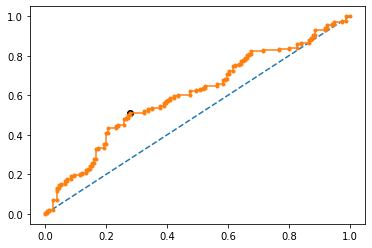

In [ ]:
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Pre-Attribution

In [ ]:
########################
###### Step 12 #########
########################

test_df= df.loc[test_idx]
df_network = test_df[['Id','SMILES','Experimental value','Predicted value'] ]
df_network.insert(4, 'Predicted value_GNN', Predictions, True)
Data_lst = []
for data in test_loader: Data_lst.append(data)
df_network.insert(5, 'Graph Data', Data_lst, True)

In [ ]:
########################
###### Step 13 #########
########################

Id = df_network['Id'].to_list()
Exp_lst = df_network['Experimental value'].to_list()
Pd_Q = df_network['Predicted value'].to_list()
Pd_GNN = df_network['Predicted value_GNN'].to_list()

# To choose first five compounds for each case
# To compare with rdkit renderings
correct = []
correct_Q = []
correct_GNN = []
incorrect = []
for i, t in enumerate(zip(Id,Exp_lst, Pd_Q, Pd_GNN)):
  if Exp_lst[i] == Pd_Q[i] and Pd_Q[i] == Pd_GNN[i]:
    correct.append(Id[i])
  elif Exp_lst[i] == Pd_Q[i] and Exp_lst[i] != Pd_GNN[i]:
     correct_Q.append(Id[i])
  elif Exp_lst[i] != Pd_Q[i] and Exp_lst[i] == Pd_GNN[i]:
     correct_GNN.append(Id[i])
  elif Exp_lst[i] != Pd_Q[i] and Exp_lst[i] != Pd_GNN[i]:
     incorrect.append(Id[i])


print(len(correct))
print('No.of correct values:',correct)
print(len(correct_Q))
print('No.of correct values:',correct_Q)
print(len(correct_GNN))
print('No.of correct values:',correct_GNN)
print(len(incorrect))
print('No.of correct values:',incorrect)


133
No.of correct values: [1281, 771, 1052, 872, 1424, 1422, 1190, 227, 554, 1343, 1323, 1235, 906, 1292, 103, 972, 1211, 267, 99, 615, 739, 775, 539, 204, 490, 1416, 289, 252, 1524, 474, 453, 100, 1122, 1246, 430, 1428, 24, 44, 448, 38, 170, 710, 1251, 1009, 346, 526, 853, 969, 659, 1449, 42, 1421, 845, 683, 622, 505, 1540, 708, 184, 1002, 520, 929, 449, 1169, 1189, 1497, 43, 957, 557, 686, 789, 1531, 1324, 1289, 376, 1220, 316, 10, 1440, 1451, 516, 469, 550, 90, 276, 1126, 701, 1423, 1484, 920, 1411, 119, 608, 25, 1407, 870, 899, 1299, 709, 1274, 1179, 1054, 303, 1147, 835, 765, 1413, 784, 285, 918, 1241, 1515, 1136, 632, 1539, 228, 1140, 393, 60, 591, 169, 900, 116, 1441, 1431, 514, 932, 1502, 1110, 210, 715, 1445, 345]
72
No.of correct values: [643, 310, 669, 1180, 889, 1269, 954, 1349, 1368, 687, 187, 1124, 1300, 759, 28, 482, 328, 1199, 408, 230, 1448, 465, 136, 1410, 822, 679, 8, 657, 1239, 677, 1037, 1346, 680, 92, 1512, 897, 94, 979, 1092, 293, 865, 958, 1254, 481, 892, 273, 8

In [ ]:
########################
###### Step 14 #########
########################

def createDF(df_network,ind_lst,ctype):
  df_new = df_network.loc[df_network['Id'].isin(ind_lst)]
  if ctype == 'Mutagenic':
    df_c_p = df_new.loc[df_network['Experimental value']==1][0:5]
  elif ctype == 'Non-Mutagenic':
    df_c_p = df_new.loc[df_network['Experimental value']==0][0:5]
  return df_c_p

In [ ]:
# df_c_M = df_network.loc[[1281, 1052, 872, 1424, 1422]]
# df_c_NM = df_network.loc[[771, 227, 1323, 906, 1292]]
# df_cQ_M = df_network.loc[[643, 310, 669, 889, 954]]
# df_cQ_NM = df_network.loc[[1180, 1269, 1124, 28, 1239]]
# df_cG_M = df_network.loc[[243, 1193, 380, 423, 237]]
# df_cG_NM = df_network.loc[[128, 1095, 1015, 1508, 1511]]
# df_cI_M = df_network.loc[[411, 270, 991, 1160, 120]]
# df_cI_NM = df_network.loc[[532, 177, 629, 1005, 1042]]

#Attribution

Load best model parameters
Change PATH in step 15

In [ ]:
########################
###### Step 15 #########
########################

def load_checkpoint(filepath):
    model = torch.load(filepath)
    model.eval()
    return model
PATH     = path_out + 'Carc_best_model0_282.pth'
#PATH = '/content/drive/My Drive/Colab Notebooks/GNN_EHS/demo_module/OctWat_best_model.pth'
model = load_checkpoint(PATH)

In [ ]:
def generateFigures(df_c_M,nameF,nameFT):
    appd = [str(df_c_M['Id'].to_list()[i])+nameFT for i in range(5)]
    net_Path_dict = {'absPath':path_out,'name':''}
    # THIS_FOLDER1 = os.path.dirname(os.path.abspath(net_Path_dict['absPath']))
    # print(THIS_FOLDER1)
    #f = random.choice([(t,l) for t,l in zip(test_loader,test_data)])# if not t.y.item()
    #df_c_p['Graph Data'].
    edge_mask_lst = []
    for i,t in enumerate(appd):
      net_Path_dict['name'] = 'Carc_Antares_Analysis/'+nameF+appd[i]+'.png'
      f = df_c_M['Graph Data'].iloc[i]
      mol = to_molecule(f,Total_atom_list)
    #mol = to_molecule(data)
      for title, method in [('Integrated Gradients', 'ig')]: #, ('Saliency', 'saliency')#('Integrated Gradients', 'ig')
          #out = model_forward(edge_mask, data)
          edge_mask = explain(method, f)
          edge_mask_dict = aggregate_edge_directions(edge_mask, f)
          plt.figure(figsize=(8, 8))
          plt.title(title)
          draw_molecule(mol,net_Path_dict,edge_mask_dict)
      edge_mask_lst.append(edge_mask_dict)
    return edge_mask_lst
      

To generate attribution figures

In [ ]:
# Correct in case of both GNN and QSAR
df_c_M = createDF(df_network,correct,'Mutagenic')
edge_mask_lst1 = generateFigures(df_c_M,'absC/','M')
df_c_NM = createDF(df_network,correct,'Non-Mutagenic')
edge_mask_lst2 = generateFigures(df_c_NM,'absC/','NM')
# Correct in case of QSAR and not GNN 
df_cQ_M = createDF(df_network,correct_Q,'Mutagenic')
edge_mask_lst3 = generateFigures(df_cQ_M,'CQ/','M')
df_cQ_NM = createDF(df_network,correct_Q,'Non-Mutagenic')#Non-Mutagenic
edge_mask_lst4 = generateFigures(df_cQ_NM,'CQ/','NM')
# Correct in case of GNN and not QSAR
df_cG_M = createDF(df_network,correct_GNN,'Mutagenic')
edge_mask_lst5 = generateFigures(df_cG_M,'CG/','M')
df_cG_NM = createDF(df_network,correct_GNN,'Non-Mutagenic')
edge_mask_lst6 = generateFigures(df_cG_NM,'CG/','NM')
# Correct in case of neither GNN and nor QSAR
df_cI_M = createDF(df_network,incorrect,'Mutagenic')
edge_mask_lst7 = generateFigures(df_cI_M,'InC/','M')
df_cI_NM = createDF(df_network,incorrect,'Non-Mutagenic')
edge_mask_lst8 = generateFigures(df_cI_NM,'InC/','NM')
#df_cQ_p[['Experimental value', 'Predicted value','Predicted value_GNN']]
